
**WALMART CASE STUDY**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [ ]:
data=pd.read_csv("/content/walmart_data.csv")

In [ ]:
df=data.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#on shape of data
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data_types=df.dtypes
data_types

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
#categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

In [ ]:
categorical_attributes = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for category in categorical_attributes:
    df[category] = df[category].astype('category')

In [ ]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
df[categorical_attributes].describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


1. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

2. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions.

3. Occupation-We have 21 unique occupation groups in the dataset. 4th Occupation group has maximum of 72308.

4. City_Category- We have 3 unique groups in the dataset.B is the top City_Cartegory has maximum of 231173.

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59%(324731) of the total transactions were done by Unmarried Customers and 41% by Married Customers.

7. Product_Category-We have 20 unique Product_Category groups in the dataset. 5th Product_Category group has maximum of 150933.



In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values in the dataset.

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
df['Gender'].nunique()

2

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df['Age'].nunique()

7

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df['Occupation'].nunique()

21

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df['City_Category'].nunique()

3

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'].nunique()

5

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Marital_Status'].nunique()

2

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].nunique()

20

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
df['Purchase'].nunique()

18105

In [ ]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
df.duplicated().value_counts()

False    550068
dtype: int64

There are no duplicate entries in the datase

In [ ]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

The dataset contains no null values or missing values

Univariate Analysis

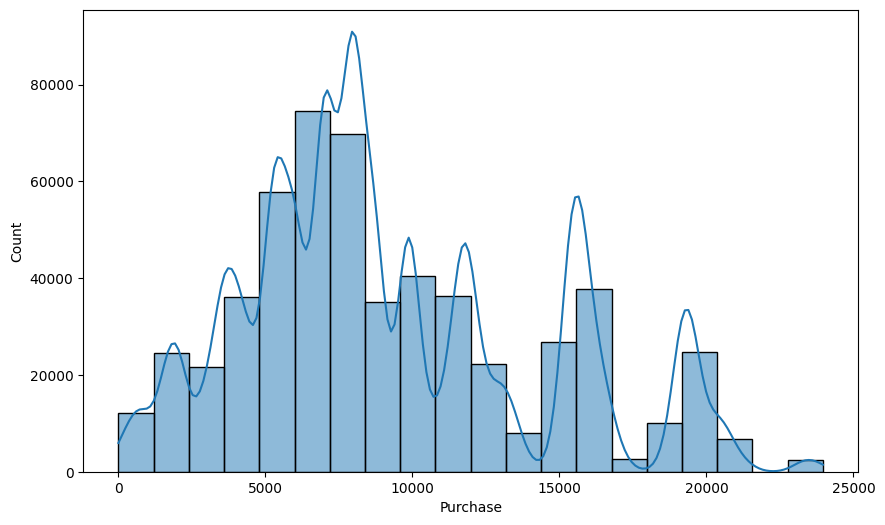

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True,bins=20)
plt.show()

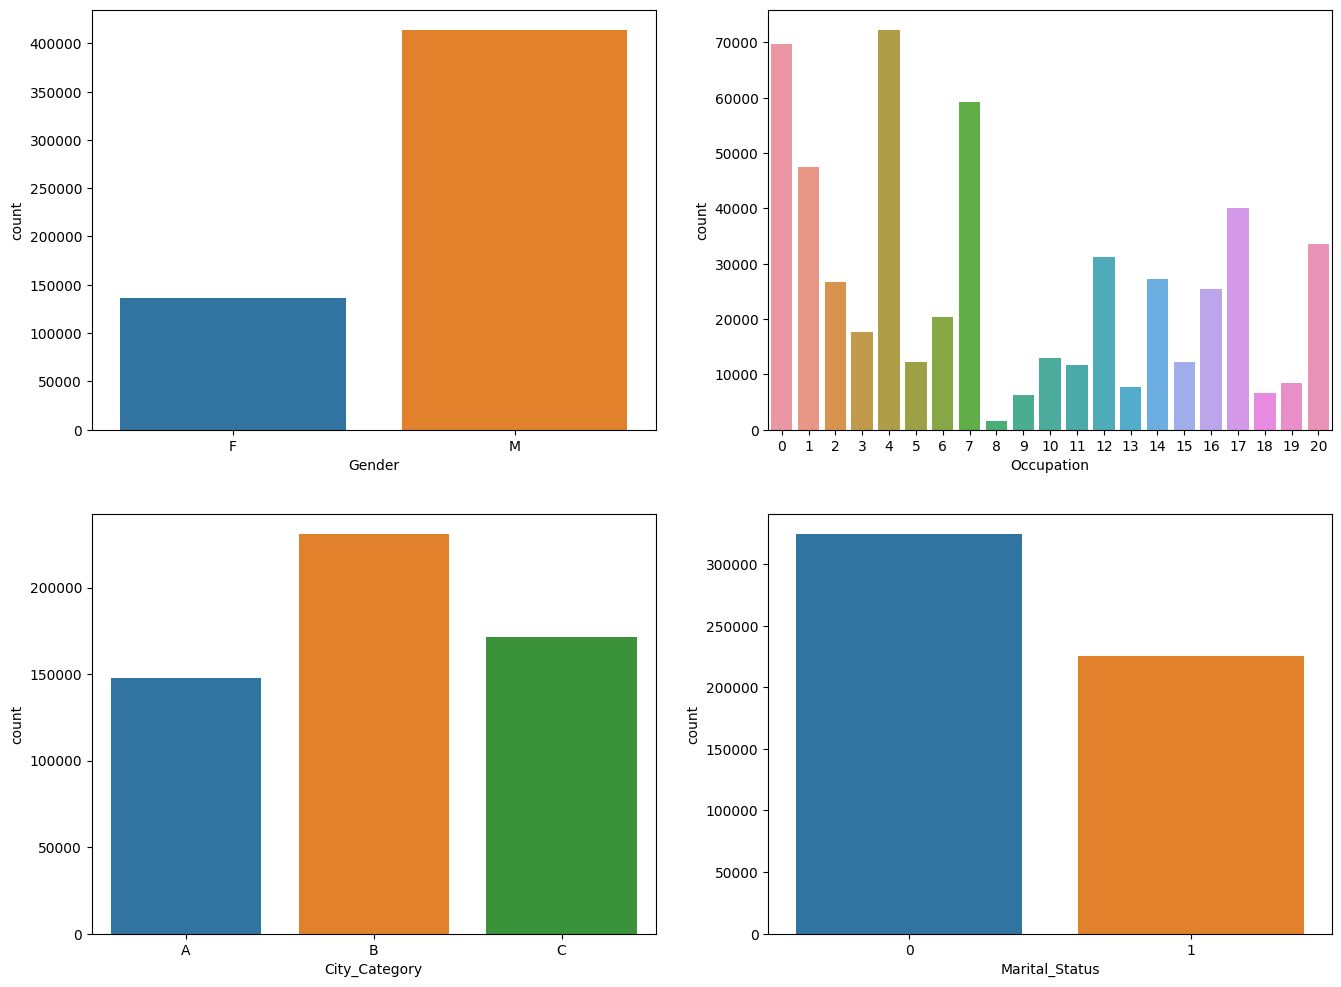

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

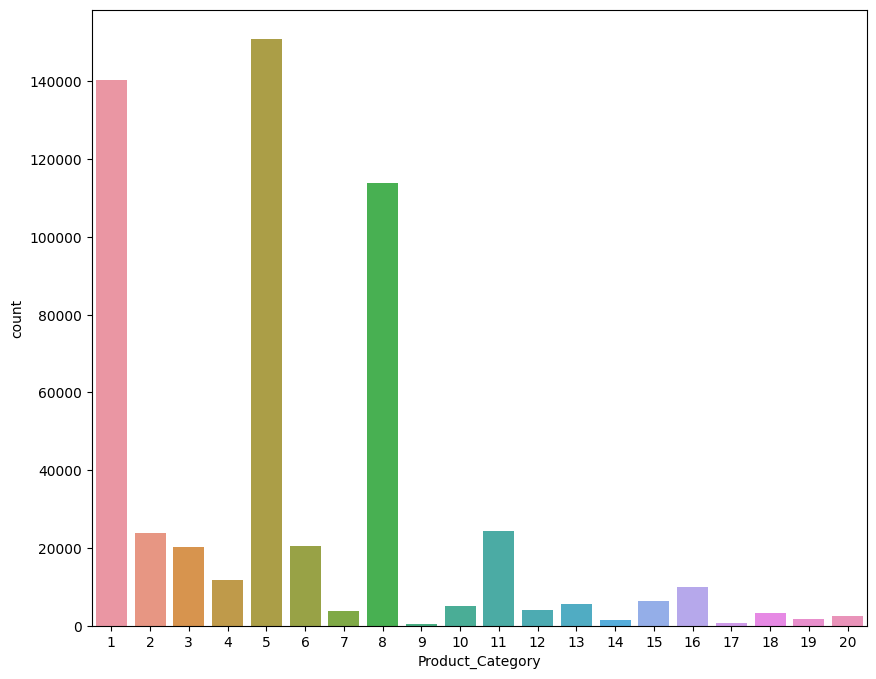

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

Most of the users are Male

There are 20 different types of Occupation and Product_Category

More users belong to B City_Category

More users are Single as compare to Married

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.


Text(0.5, 1.0, 'Outliers for Purchase')

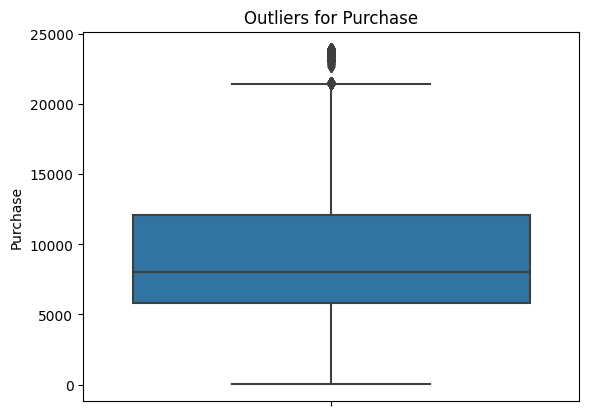

In [ ]:
#checking outliers
sns.boxplot(y="Purchase",data=df)
plt.title("Outliers for Purchase")


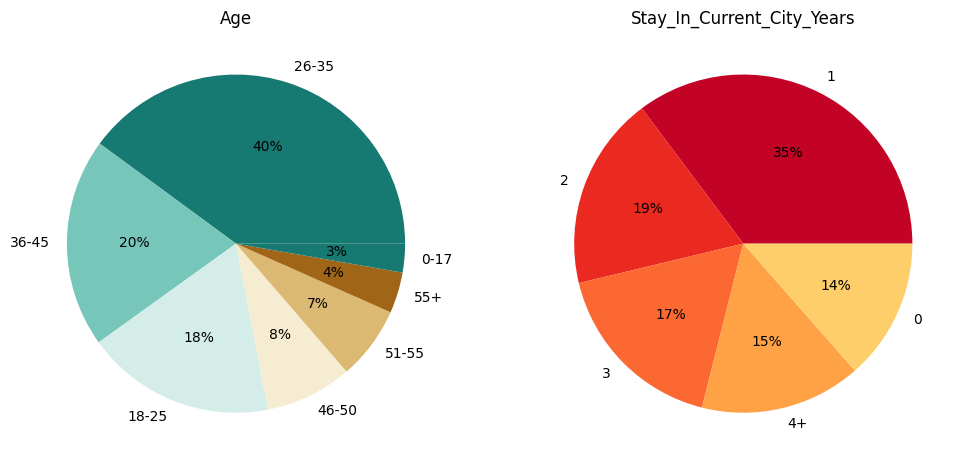

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

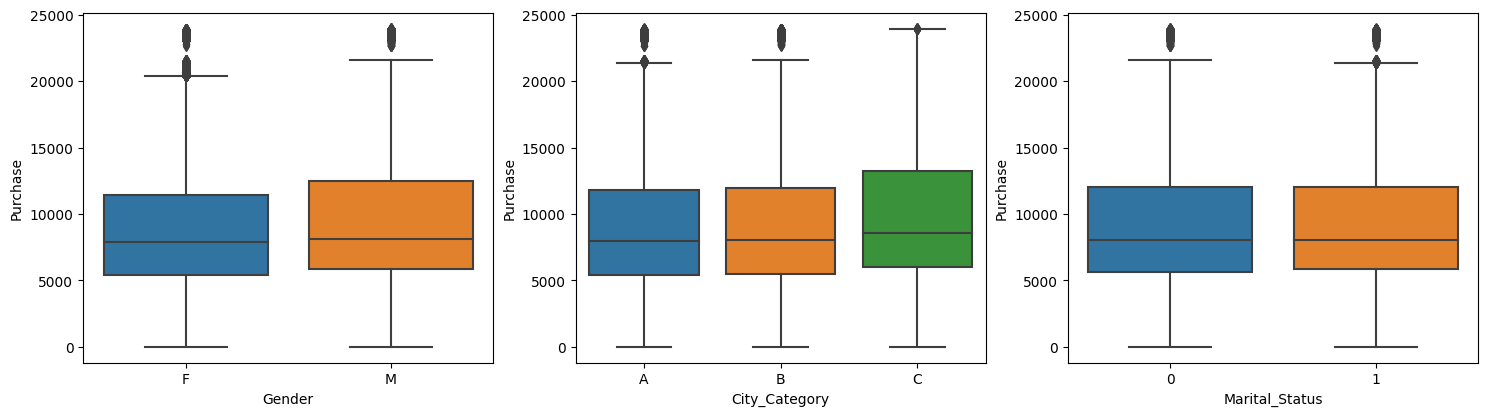

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.boxplot(x="Gender",y="Purchase",data=df)
plt.subplot(2,3,2)
sns.boxplot(x="City_Category",y="Purchase",data=df)
plt.subplot(2,3,3)
sns.boxplot(x="Marital_Status",y="Purchase",data=df)

<Axes: xlabel='Product_Category', ylabel='Purchase'>

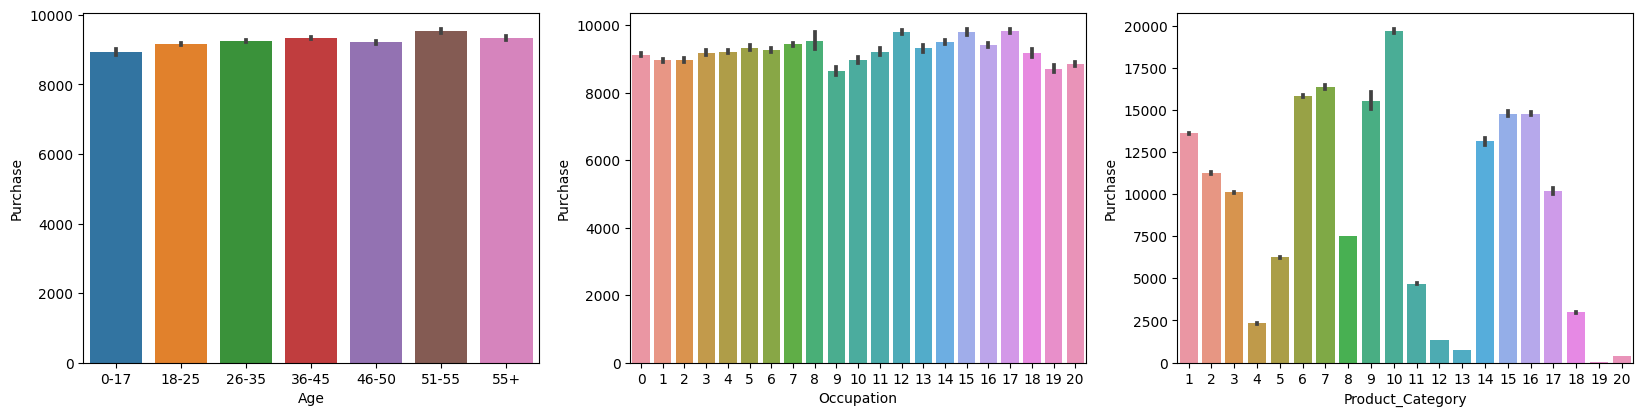

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x="Age",y="Purchase",data=df)
plt.subplot(2,3,2)
sns.barplot(x="Occupation",y="Purchase",data=df)
plt.subplot(2,3,3)
sns.barplot(x="Product_Category",y="Purchase",data=df)

Most of the users are Male with count of 412171 users

There are 20 different types of Occupation and Product_Category

More users belong to B City_Category with count of 230114

More users are Single as compare to Married with count of 323242

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

Most purchases are made from the age group of (26-35) with count of 218661

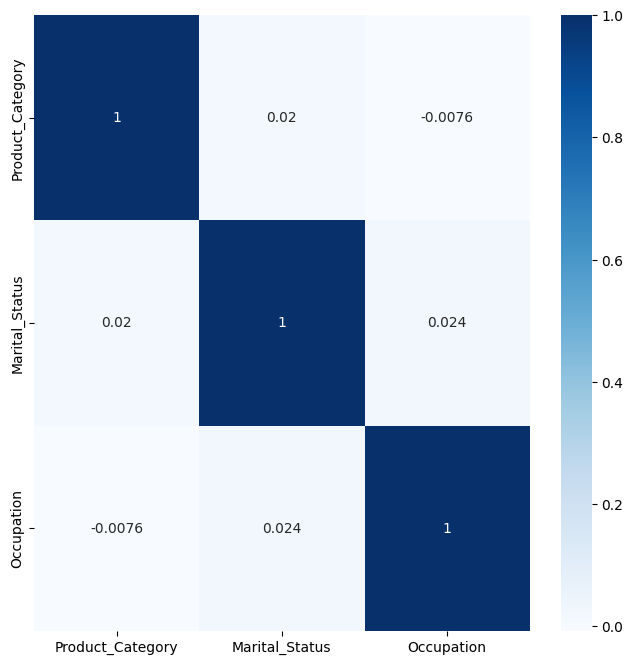

In [ ]:
plt.figure(figsize=(8, 8))
map=df[["Product_Category","Marital_Status","Occupation"]]
sns.heatmap(map.corr(),cmap="Blues",annot=True)
plt.show()

In [ ]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
df_male=df[df["Gender"]=="M"]
df_female=df[df["Gender"]=="F"]

In [ ]:
df[df.Gender=="M"]["Purchase"].mean()

9437.526040472265

In [ ]:
df[df.Gender=="F"]["Purchase"].mean()

8734.565765155476

Male customers spend more money than female customers

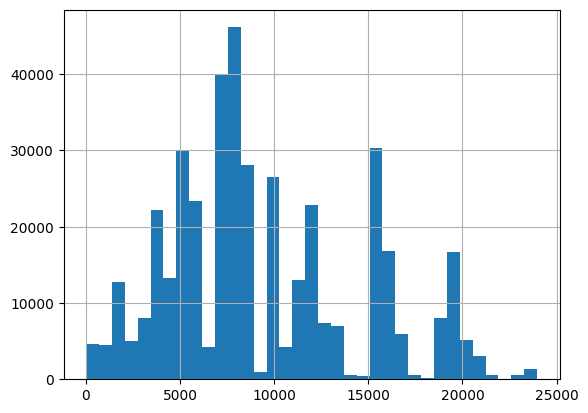

In [ ]:
df[df.Gender=="M"]["Purchase"].hist(bins=35)
plt.show()

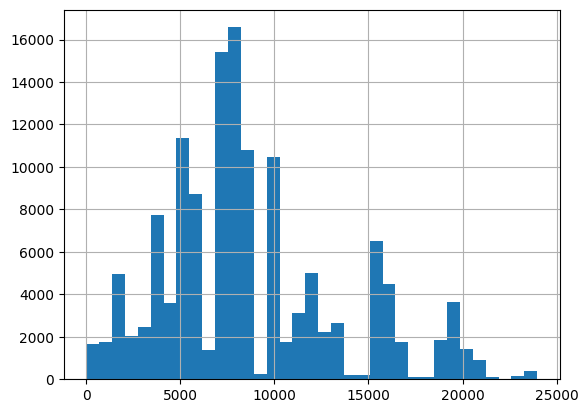

In [ ]:
df[df.Gender=="F"]["Purchase"].hist(bins=35)
plt.show()

In [ ]:
df_male = df[df['Gender']=='M']
df_female= df[df['Gender']=='F']

In [ ]:
#Calculating interval of a female sample where population mean will lie
sample_female_mean=(df_female["Purchase"].sample(4000)).mean()
sample_female_std=(df_female["Purchase"].sample(4000)).std()
stderr=sample_female_std/(np.sqrt(4000))
me=stderr*1.96
print(sample_female_mean-me,sample_female_mean+me)


8550.261037571607 8846.423462428393


In [ ]:
#Calculating interval of a female sample where population mean will lie
sample_male_mean=(df_male["Purchase"].sample(4000)).mean()
sample_male_std=(df_male["Purchase"].sample(4000)).std()
stderr=sample_male_std/(np.sqrt(4000))
me=stderr*1.96
print(sample_male_mean-me,sample_male_mean+me)

9247.907313582273 9561.430686417727


Now we can infer about the population that, 95% of the times:


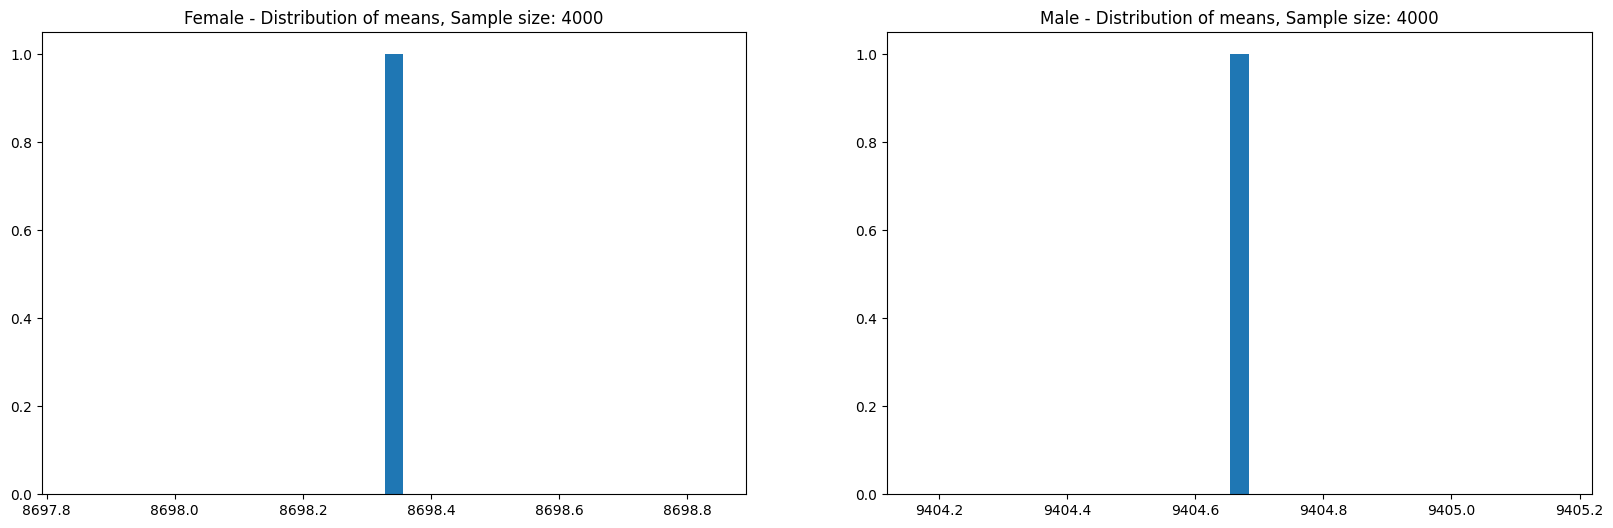

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(sample_female_mean, bins=35)
axis[1].hist(sample_male_mean, bins=35)
axis[0].set_title("Female - Distribution of means, Sample size: 4000")
axis[1].set_title("Male - Distribution of means, Sample size: 4000")
plt.show()

In [ ]:
 #Using central limit theorem based on the catagories of Gender 0f sample size 5000
df_male_means=[]
df_female_means=[]
sample_size=5000
n=2000
for i in range(n):
  male_mean = df[df['Gender']=="M"].sample(sample_size, replace=True)['Purchase'].mean()
  female_mean = df[df['Gender']=="F"].sample(sample_size, replace=True)['Purchase'].mean()
  df_male_means.append(male_mean)
  df_female_means.append(female_mean)


<Axes: ylabel='Density'>

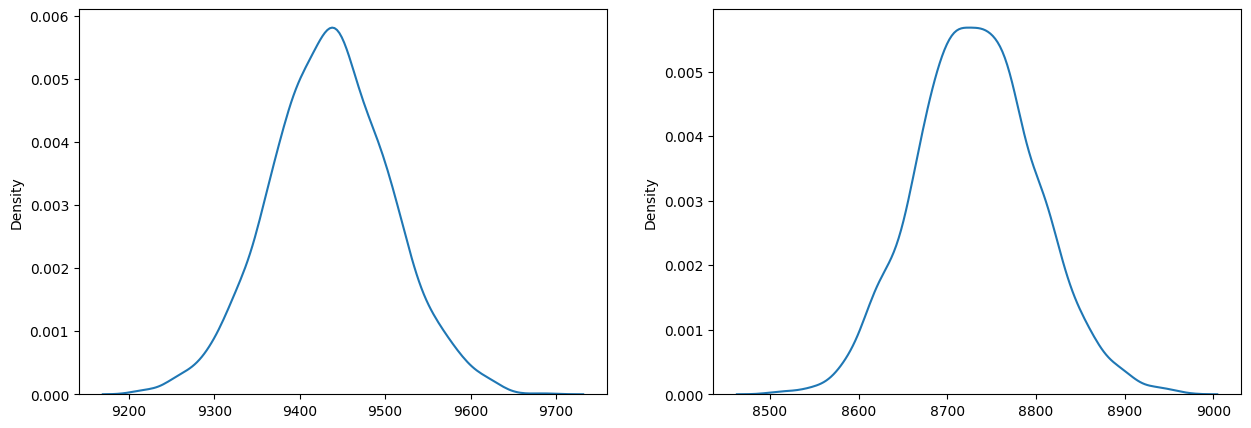

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df_male_means)
plt.subplot(1,2,2)
sns.kdeplot(x=df_female_means)

FEMALE DATA for 5000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.9)
me=se*z
print(f_mean-me,f_mean+me)


8648.165019924947 8820.966510386004


In [ ]:
#confidence interval for 95%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

8623.671609208383 8845.459921102569


In [ ]:
#confidence interval for 99%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

8577.72604415902 8891.40548615193


MALE DATA for 5000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.9)
me=se*z
print(f_mean-me,f_mean+me)

9345.235888789164 9529.816192155366


In [ ]:
#confidence interval for 95%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

9319.072913177819 9555.97916776671


In [ ]:
#confidence interval for 99%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(5000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

9269.995522048177 9605.056558896353


In [ ]:
 #Using central limit theorem based on the catagories of Gender 0f sample size 50000
df_male_means=[]
df_female_means=[]
sample_size=50000
n=2000
for i in range(n):
  male_mean = df[df['Gender']=="M"].sample(sample_size, replace=True)['Purchase'].mean()
  female_mean = df[df['Gender']=="F"].sample(sample_size, replace=True)['Purchase'].mean()
  df_male_means.append(male_mean)
  df_female_means.append(female_mean)


<Axes: ylabel='Density'>

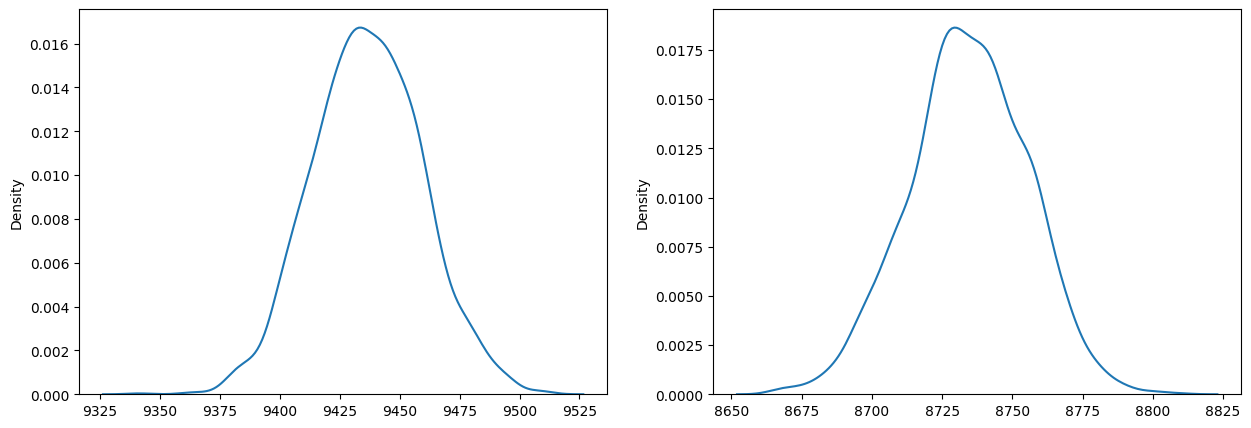

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df_male_means)
plt.subplot(1,2,2)
sns.kdeplot(x=df_female_means)

FEMALE DATA FOR 50000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.9)
me=se*z
print(f_mean-me,f_mean+me)

8707.243450509035 8761.888079801916


In [ ]:
#confidence interval for 95%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

8699.497953956003 8769.633576354949


In [ ]:
#confidence interval for 99%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

8684.968690562062 8784.16283974889


MALE DATA FOR 50000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.9)
me=se*z
print(f_mean-me,f_mean+me)

9408.341331980162 9466.710748964368


In [ ]:
#confidence interval for 95%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

9400.067872650234 9474.984208294296


In [ ]:
#confidence interval for 99%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(50000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

8684.968690562062 8784.16283974889


In [ ]:
 #Using central limit theorem based on the catagories of Gender 0f sample size 500000
df_male_means=[]
df_female_means=[]
sample_size=500000
n=2000
for i in range(n):
  male_mean = df[df['Gender']=="M"].sample(sample_size, replace=True)['Purchase'].mean()
  female_mean = df[df['Gender']=="F"].sample(sample_size, replace=True)['Purchase'].mean()
  df_male_means.append(male_mean)
  df_female_means.append(female_mean)

<Axes: ylabel='Density'>

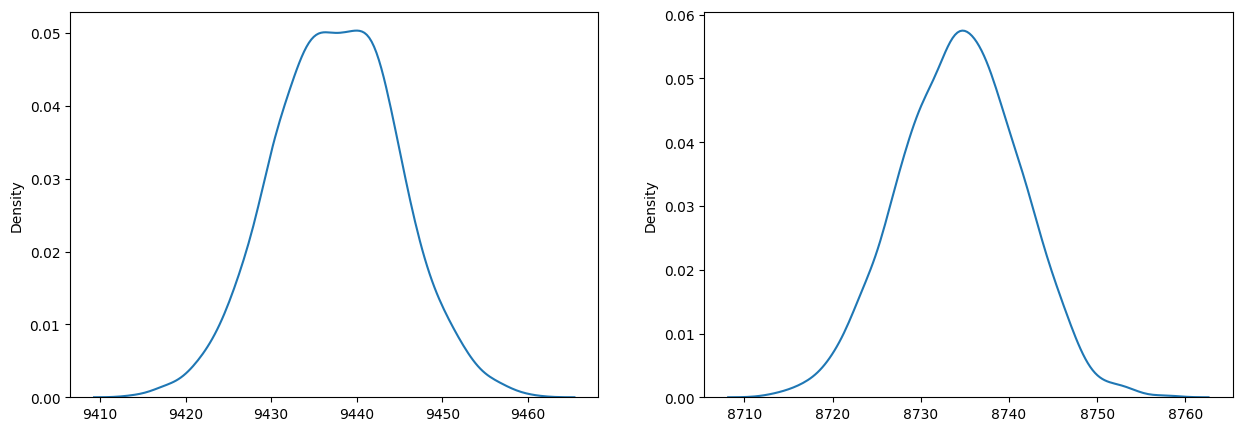

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df_male_means)
plt.subplot(1,2,2)
sns.kdeplot(x=df_female_means)

FEMALE DATA FOR 500000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.90)
me=se*z
print(f_mean-me,f_mean+me)

8725.925690632423 8743.205839678529


In [ ]:
#confidence interval for 95%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

8723.476349560766 8745.655180750186


In [ ]:
#confidence interval for 99%
f_mean=df[df["Gender"]=="F"]["Purchase"].mean()
s=df[df["Gender"]=="F"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

8718.88179305583 8750.24973725512


MALE DATA FOR 500000

In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.90)
me=se*z
print(f_mean-me,f_mean+me)

9428.297025303955 9446.755055640575


In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.95)
me=se*z
print(f_mean-me,f_mean+me)

9425.68072774282 9449.37135320171


In [ ]:
#confidence interval for 90%
f_mean=df[df["Gender"]=="M"]["Purchase"].mean()
s=df[df["Gender"]=="M"]["Purchase"].std()
se=s/(np.sqrt(500000))
z=norm.ppf(0.99)
me=se*z
print(f_mean-me,f_mean+me)

9420.772988629857 9454.279092314673


Female Analysis

Sample size=5000

For 90% confidance interval the range is (8648.165,8820.966)

For 95% confidance interval the range is (8623.617,8845.459)

For 99% confidance interval the range is (8577.726,8891.405)

Sample size=50000

For 90% confidance interval the range is (8707.243,8761.888)

For 95% confidance interval the range is (8699.497,8769.633)

For 99% confidance interval the range is (8684.968,8784.162)

Sample size=500000

For 90% confidance interval the range is (8725.925,8743.205)

For 95% confidance interval the range is (8723.476,8745.655)

For 99% confidance interval the range is (8718.881,8750.249)

Male Analysis

Sample size=5000
816
For 90% confidance interval the range is (9345.235,9529.816)

For 95% confidance interval the range is (9319.072,9555.979)

For 99% confidance interval the range is (9269.995,9605.056)

Sample size=50000

For 90% confidance interval the range is (9408.341,9466.710)

For 95% confidance interval the range is (9400.0678,9474.984)

For 99% confidance interval the range is (8684.968,8784.162)

Sample size=500000

For 90% confidance interval the range is (9428.297,9446.755)

For 95% confidance interval the range is (9425.680,9449.371)

For 99% confidance interval the range is (9420.772,9454.279)

MARITAL STATUS ANALYSIS

In [ ]:
#Average based on Marital status
df.groupby("Marital_Status")["Purchase"].mean()


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
df_unmarried=df[df["Marital_Status"]==0]
df_married=df[df["Marital_Status"]==1]

In [ ]:
#Unamried
df_mean_unmaried=(df_unmarried["Purchase"].sample(3000)).mean()
df_std_unmaried=(df_unmarried["Purchase"].sample(3000)).std()
se=df_std_unmaried/(np.sqrt(3000))
me=se*1.96
print(df_mean_unmaried-me,df_mean_unmaried+me)


9112.234520876867 9471.902145789798


In [ ]:
#Maried
df_mean_maried=(df_married["Purchase"].sample(3000)).mean()
df_std_maried=(df_married["Purchase"].sample(3000)).std()
se=df_std_unmaried/(np.sqrt(3000))
me=se*1.96
print(df_mean_maried-me,df_mean_maried+me)

9076.365520876869 9436.0331457898


In [ ]:
# marital status 0f sample size 5000
married_means=[]
unmarried_means=[]
samp_size=5000
repetitions=1000
for i in range(repetitions):
 married_mean = df[df["Marital_Status"]==1].sample(samp_size, replace=True)['Purchase'].mean()
 unmarried_mean = df[df["Marital_Status"]==0].sample(samp_size, replace=True)['Purchase'].mean()
 married_means.append(married_mean)
 unmarried_means.append(unmarried_mean)

<Axes: ylabel='Density'>

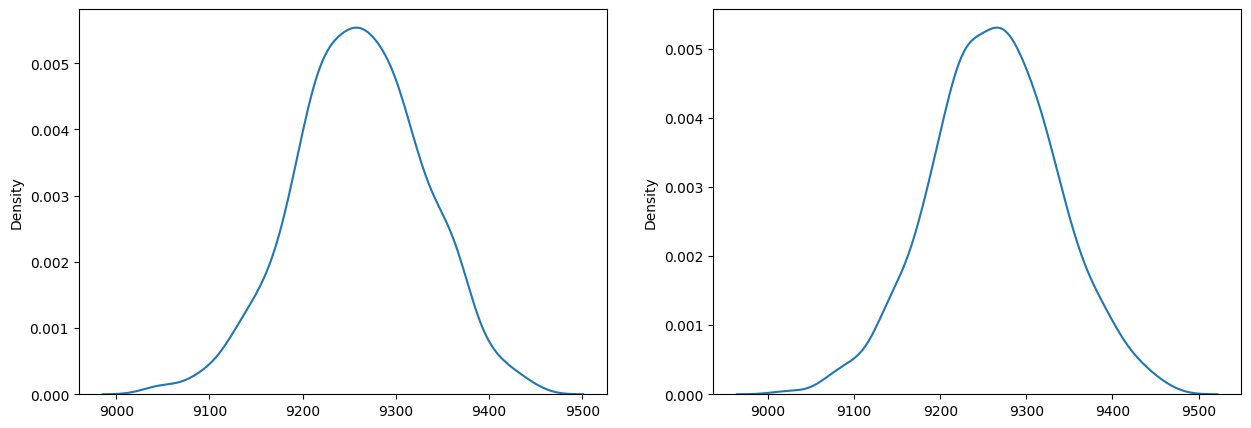

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=married_means)
plt.subplot(1,2,2)
sns.kdeplot(x=unmarried_means)

MARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 5000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9170.248947858021 9352.100200306726


In [ ]:
#confidance interval of 95% for sample size 5000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9144.472796253867 9377.87635191088


In [ ]:
#confidance interval of 99% for sample size 5000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9096.121022629712 9426.228125535035


UNMARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 5000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9174.79258947701 9357.022648366003


In [ ]:
#confidance interval of 95% for sample size 5000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9148.962744691742 9382.852493151271


In [ ]:
#confidance interval of 99% for sample size 5000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9100.510251589434 9431.304986253579


In [ ]:
# marital status 0f sample size 50000
married_means=[]
unmarried_means=[]
samp_size=50000
repetitions=1000
for i in range(repetitions):
 married_mean = df[df["Marital_Status"]==1].sample(samp_size, replace=True)['Purchase'].mean()
 unmarried_mean = df[df["Marital_Status"]==0].sample(samp_size, replace=True)['Purchase'].mean()
 married_means.append(married_mean)
 unmarried_means.append(unmarried_mean)

<Axes: ylabel='Density'>

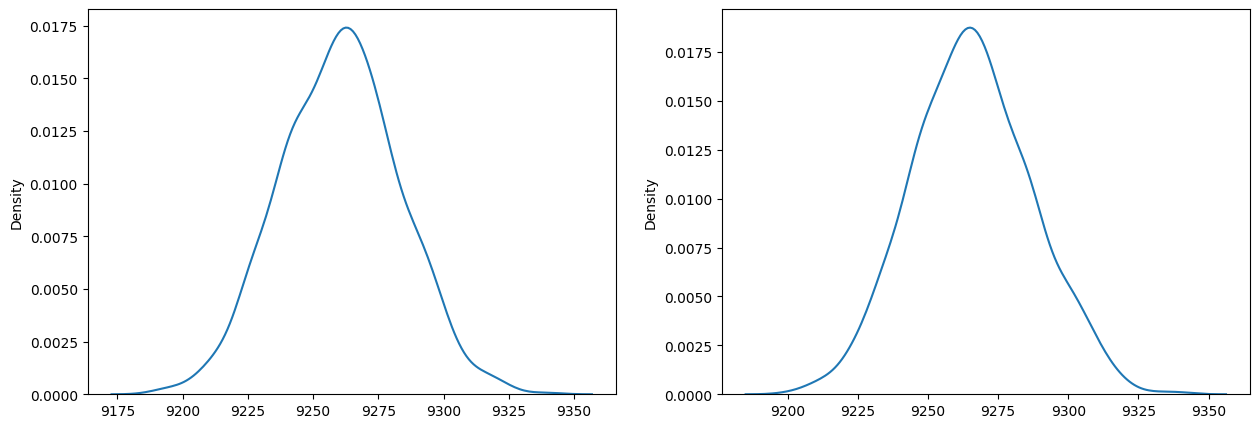

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=married_means)
plt.subplot(1,2,2)
sns.kdeplot(x=unmarried_means)

MARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 50000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9232.421366427765 9289.927781736982


In [ ]:
#confidance interval of 95% for sample size 50000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9224.270231589471 9298.078916575276


In [ ]:
#confidance interval of 99% for sample size 50000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9208.980058233354 9313.369089931393


UNMARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 50000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9237.094516709714 9294.720721133299


In [ ]:
#confidance interval of 95% for sample size 50000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9228.926402596708 9302.888835246305


In [ ]:
#confidance interval of 99% for sample size 50000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9213.60437894502 9318.210858897994


In [ ]:
# marital status 0f sample size 500000
married_means=[]
unmarried_means=[]
samp_size=500000
repetitions=1000
for i in range(repetitions):
 married_mean = df[df["Marital_Status"]==1].sample(samp_size, replace=True)['Purchase'].mean()
 unmarried_mean = df[df["Marital_Status"]==0].sample(samp_size, replace=True)['Purchase'].mean()
 married_means.append(married_mean)
 unmarried_means.append(unmarried_mean)

<Axes: ylabel='Density'>

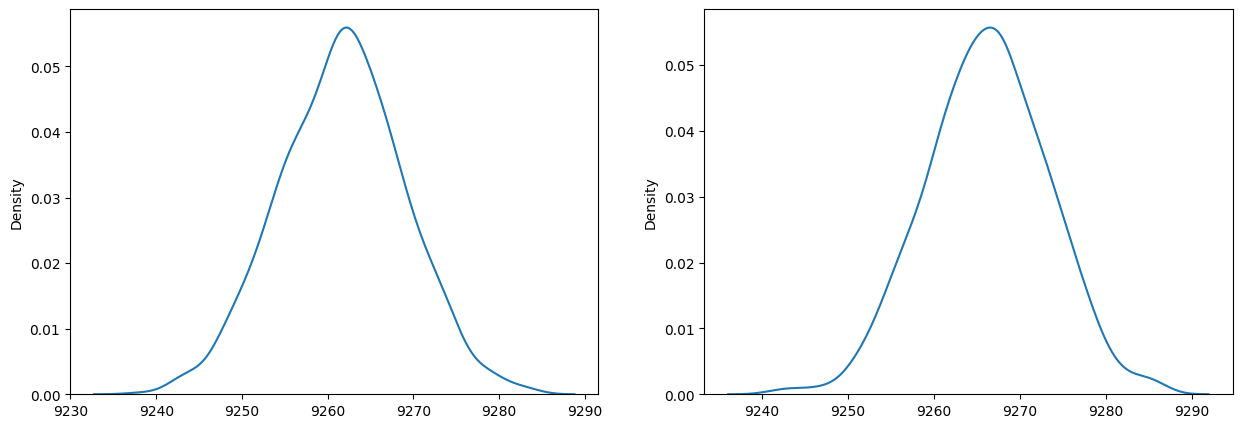

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=married_means)
plt.subplot(1,2,2)
sns.kdeplot(x=unmarried_means)

MARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 500000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9252.08201145994 9270.267136704808


In [ ]:
#confidance interval of 95% for sample size 500000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9249.504396299522 9272.844751865225


In [ ]:
#confidance interval of 99% for sample size 500000 of married
m_mean=df[df["Marital_Status"]==1]["Purchase"].mean()
s=df[df["Marital_Status"]==1]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9244.669218937108 9277.67992922764


UNMARIED ANALYSIS

In [ ]:
#confidance interval of 90% for sample size 500000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.90)
print(m_mean-me,m_mean+me)

9256.796115977057 9275.019121865957


In [ ]:
#confidance interval of 95% for sample size 500000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(m_mean-me,m_mean+me)

9254.21313149853 9277.602106344482


In [ ]:
#confidance interval of 99% for sample size 500000 of unmarried
m_mean=df[df["Marital_Status"]==0]["Purchase"].mean()
s=df[df["Marital_Status"]==0]["Purchase"].std()
se=s/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(m_mean-me,m_mean+me)

9249.367882188299 9282.447355654715


Married Analysis

Sample size=5000

For 90% confidance interval the range is (9170.248,9352.100)

For 95% confidance interval the range is (9144.472,9377.876)

For 99% confidance interval the range is (9096.121,9426.228)

Sample size=50000

For 90% confidance interval the range is (9232.421,9289.927)

For 95% confidance interval the range is (9222.270,9298.078)

For 99% confidance interval the range is (9208.980,9313.3690)

Sample size=500000

For 90% confidance interval the range is (9252.082,9270.267)

For 95% confidance interval the range is (9249.504,9272.844)

For 99% confidance interval the range is (9244.669,9277.679)


Unmarried Analysis

Sample size=5000

For 90% confidance interval the range is (9174.792,9357.022)

For 95% confidance interval the range is (9148.962,9382.852)

For 99% confidance interval the range is (9100.510,9431.304)

Sample size=50000

For 90% confidance interval the range is (9237.094,9294.720)

For 95% confidance interval the range is (9228.926,9302.888)

For 99% confidance interval the range is (9213.604,9318.210)

Sample size=500000

For 90% confidance interval the range is (9256.796,9257.019)

For 95% confidance interval the range is (9257.213,9277.602)

For 99% confidance interval the range is (9249.367,9282.447)

AGE BASED ANALYSIS

In [ ]:
df.groupby("Age")["Purchase"].mean()


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [ ]:
df_a1=df[df["Age"]=="0-17"]
df_a2=df[df["Age"]=="18-25"]
df_a3=df[df["Age"]=="26-35"]
df_a4=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]
df_a5=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]

In [ ]:
#Calculating interval of age 0-17 group sample where population mean will lie
df_a1_mean=(df_a1["Purchase"].sample(3000)).mean()
df_a1_std=(df_a1["Purchase"].sample(3000)).std()
se=df_a1_std/(np.sqrt(3000))
me=se*1.96
print(df_a1_mean-me,df_a1_mean+me)


8786.920961238902 9146.749705427763


In [ ]:
#Calculating interval of age 18-25 group sample where population mean will lie
df_a2_mean=(df_a2["Purchase"].sample(3000)).mean()
df_a2_std=(df_a2["Purchase"].sample(3000)).std()
se=df_a2_std/(np.sqrt(3000))
me=se*1.96
print(df_a2_mean-me,df_a2_mean+me)


8894.78557756834 9256.046422431658


In [ ]:
#Calculating interval of age 26-35 group sample where population mean will lie
df_a3_mean=(df_a3["Purchase"].sample(3000)).mean()
df_a3_std=(df_a3["Purchase"].sample(3000)).std()
se=df_a3_std/(np.sqrt(3000))
me=se*1.96
print(df_a3_mean-me,df_a3_mean+me)


9062.735540492615 9421.637126174051


In [ ]:
#Calculating interval of age 45-50 group sample where population mean will lie
df_a4_mean=(df_a4["Purchase"].sample(3000)).mean()
df_a4_std=(df_a4["Purchase"].sample(3000)).std()
se=df_a4_std/(np.sqrt(3000))
me=se*1.96
print(df_a4_mean-me,df_a4_mean+me)

9289.043950703455 9647.850049296545


In [ ]:
#Calculating interval of age 55+ group sample where population mean will lie
df_a5_mean=(df_a5["Purchase"].sample(3000)).mean()
df_a5_std=(df_a5["Purchase"].sample(3000)).std()
se=df_a5_std/(np.sqrt(3000))
me=se*1.96
print(df_a5_mean-me,df_a5_mean+me)

9478.95810988317 9834.818556783499


In [ ]:
#Using central limit theorem based on the catagories of Age 0f sample size 5000
Age_0_17_means=[]
Age_18_25_means=[]
Age_26_35_means=[]
Age_36_50_means=[]
Age_51_means=[]
samp_size=5000
n=1000
for i in range(n):
 Age_0_17_mean = df[df["Age"]=="0-17"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_18_25_mean = df[df["Age"]=="18-25"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_26_35_mean = df[df["Age"]=="26-35"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_36_50_mean = df[(df["Age"]=="36-45")|(df["Age"]=="46-50")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_51_mean = df[(df["Age"]=="51-55")|(df["Age"]=="55+")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_0_17_means.append(Age_0_17_mean)
 Age_18_25_means.append(Age_18_25_mean)
 Age_26_35_means.append(Age_26_35_mean)
 Age_36_50_means.append(Age_36_50_mean)
 Age_51_means.append(Age_51_mean)


<Axes: ylabel='Density'>

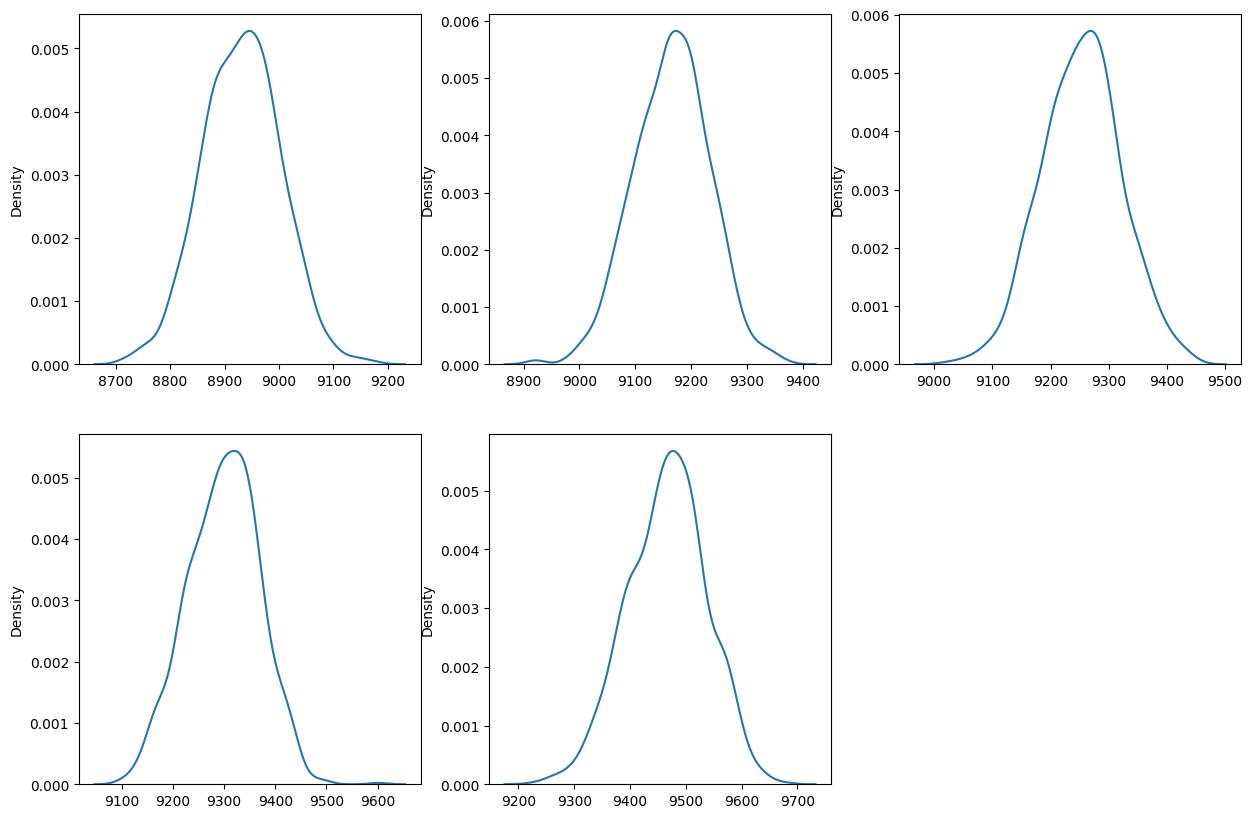

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(x=Age_0_17_means)
plt.subplot(2,3,2)
sns.kdeplot(x=Age_18_25_means)
plt.subplot(2,3,3)
sns.kdeplot(x=Age_26_35_means)
plt.subplot(2,3,4)
sns.kdeplot(x=Age_36_50_means)
plt.subplot(2,3,5)
sns.kdeplot(x=Age_51_means)

Age 0-17 Analysis

In [ ]:
#confidance interval of 90% for sample size 5000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)


8840.831443004265 9026.097837885683


In [ ]:
#confidance interval of 95% for sample size 5000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

8814.57121868733 9052.358062202618


In [ ]:
#confidance interval of 99% for sample size 5000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

8765.311405159257 9101.617875730692


Age 18-25 Analysis

In [ ]:
#confidance interval of 90% for sample size 5000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9078.422178395032 9260.905034127545


In [ ]:
#confidance interval of 95% for sample size 5000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9052.55650141353 9286.770711109048


In [ ]:
#confidance interval of 99% for sample size 5000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9004.036793070269 9335.290419452309


Age 26-35 Analysis

In [ ]:
#confidance interval of 90% for sample size 5000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9161.880457091453 9343.500808648323


In [ ]:
#confidance interval of 95% for sample size 5000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9136.137034084508 9369.244231655268


In [ ]:
#confidance interval of 99% for sample size 5000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9087.846653865685 9417.53461187409


Age 35-50 Analysis

In [ ]:
#confidance interval of 90% for sample size 5000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)


9204.586685746124 9386.076799874949


In [ ]:
#confidance interval of 95% for sample size 5000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9178.861722989768 9411.801762631305


In [ ]:
#confidance interval of 99% for sample size 5000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9130.605971130955 9460.057514490118


Age 55+ Analysis

In [ ]:
#confidance interval of 90% for sample size 5000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9371.933814937553 9555.389541449416


In [ ]:
#confidance interval of 95% for sample size 5000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9345.930240282196 9581.393116104773


In [ ]:
#confidance interval of 99% for sample size 5000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(5000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9297.151858836301 9630.171497550667


In [ ]:
#Using central limit theorem based on the catagories of Age 0f sample size 50000
Age_0_17_means=[]
Age_18_25_means=[]
Age_26_35_means=[]
Age_36_50_means=[]
Age_51_means=[]
samp_size=50000
repetitions=1000
for _ in range(repetitions):
 Age_0_17_mean = df[df["Age"]=="0-17"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_18_25_mean = df[df["Age"]=="18-25"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_26_35_mean = df[df["Age"]=="26-35"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_36_50_mean = df[(df["Age"]=="36-45")|(df["Age"]=="46-50")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_51_mean = df[(df["Age"]=="51-55")|(df["Age"]=="55+")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_0_17_means.append(Age_0_17_mean)
 Age_18_25_means.append(Age_18_25_mean)
 Age_26_35_means.append(Age_26_35_mean)
 Age_36_50_means.append(Age_36_50_mean)
 Age_51_means.append(Age_51_mean)


<Axes: ylabel='Density'>

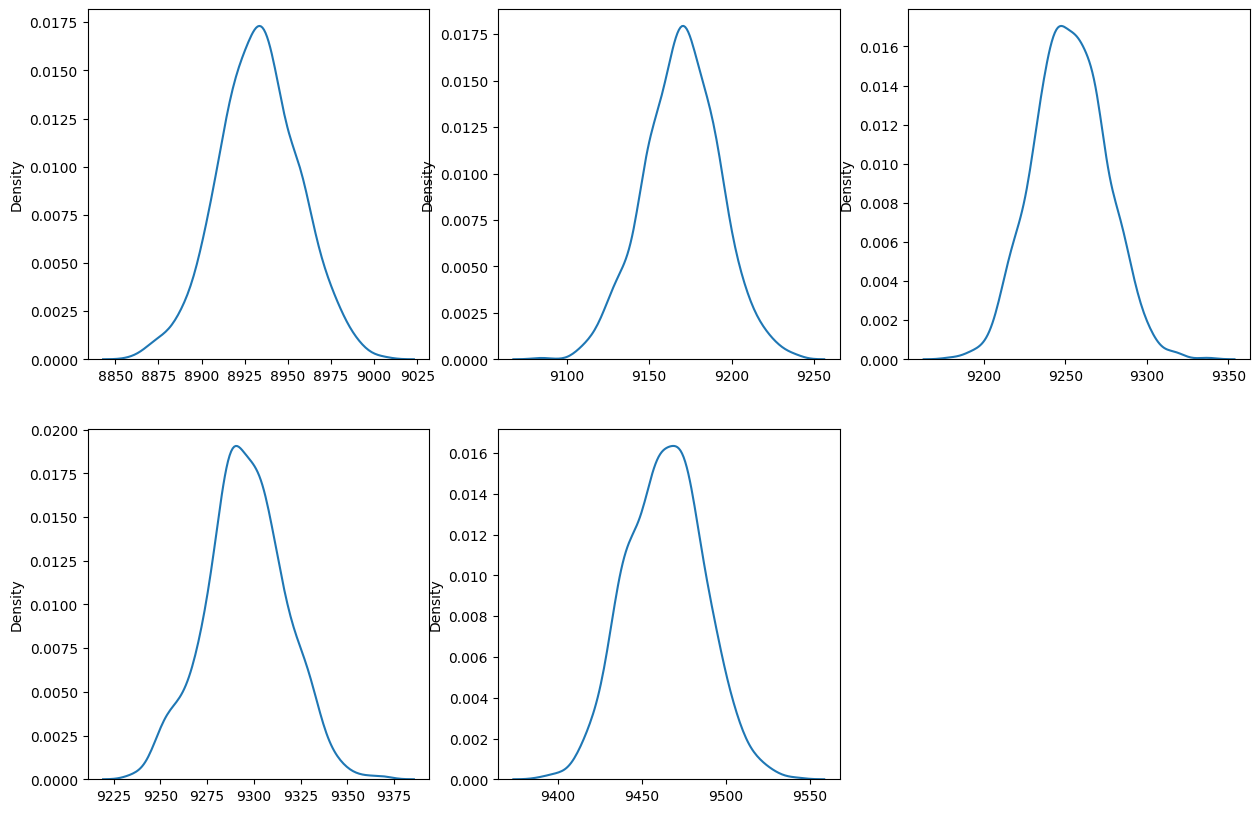

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(x=Age_0_17_means)
plt.subplot(2,3,2)
sns.kdeplot(x=Age_18_25_means)
plt.subplot(2,3,3)
sns.kdeplot(x=Age_26_35_means)
plt.subplot(2,3,4)
sns.kdeplot(x=Age_36_50_means)
plt.subplot(2,3,5)
sns.kdeplot(x=Age_51_means)

Age 0-17 Analysis

In [ ]:
#confidance interval of 90% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

8904.171451359301 8962.757829530647


In [ ]:
#confidance interval of 95% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

8895.867239288456 8971.062041601492


In [ ]:
#confidance interval of 99% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

8880.289918502067 8986.639362387881


Age 18-25 Analysis

In [ ]:
#confidance interval of 90% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9140.810533358956 9198.516679163622


In [ ]:
#confidance interval of 95% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9132.631088110582 9206.696124411996


In [ ]:
#confidance interval of 99% for sample size 50000 of 0-17
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9117.287809133404 9222.039403389173


Age 26-35 Analysis

In [ ]:
#confidance interval of 90% for sample size 50000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9223.973933851878 9281.407331887898


In [ ]:
#confidance interval of 95% for sample size 50000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9215.833148704765 9289.54811703501


In [ ]:
#confidance interval of 99% for sample size 50000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9200.562389648063 9304.818876091713


Age 36-50 Analysis

In [ ]:
#confidance interval of 90% for sample size 50000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9266.635636137988 9324.027849483085


In [ ]:
#confidance interval of 95% for sample size 50000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9258.500688634678 9332.162796986395


In [ ]:
#confidance interval of 99% for sample size 50000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9243.240880026902 9347.42260559417


Age 51+ Analysis

In [ ]:
#confidance interval of 90% for sample size 50000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9434.654780914563 9492.668575472406


In [ ]:
#confidance interval of 95% for sample size 50000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9426.431728592848 9500.89162779412


In [ ]:
#confidance interval of 99% for sample size 50000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(50000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9411.006649998295 9516.316706388674


In [ ]:
#Using central limit theorem based on the catagories of Age 0f sample size 500000
Age_0_17_means=[]
Age_18_25_means=[]
Age_26_35_means=[]
Age_36_50_means=[]
Age_51_means=[]
samp_size=400000
n=1000
for i in range(n):
 Age_0_17_mean = df[df["Age"]=="0-17"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_18_25_mean = df[df["Age"]=="18-25"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_26_35_mean = df[df["Age"]=="26-35"].sample(samp_size, replace=True)['Purchase'].mean()
 Age_36_50_mean = df[(df["Age"]=="36-45")|(df["Age"]=="46-50")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_51_mean = df[(df["Age"]=="51-55")|(df["Age"]=="55+")].sample(samp_size, replace=True)['Purchase'].mean()
 Age_0_17_means.append(Age_0_17_mean)
 Age_18_25_means.append(Age_18_25_mean)
 Age_26_35_means.append(Age_26_35_mean)
 Age_36_50_means.append(Age_36_50_mean)
 Age_51_means.append(Age_51_mean)


<Axes: ylabel='Density'>

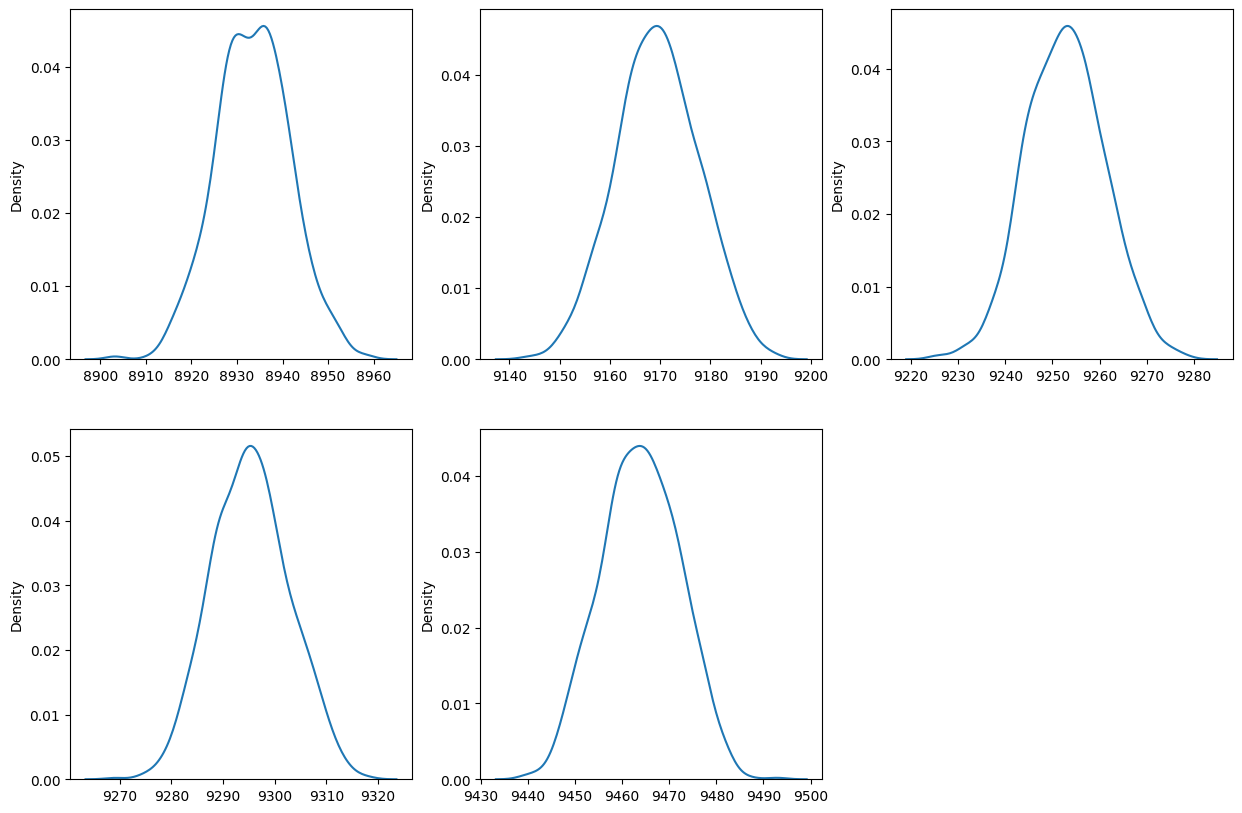

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(x=Age_0_17_means)
plt.subplot(2,3,2)
sns.kdeplot(x=Age_18_25_means)
plt.subplot(2,3,3)
sns.kdeplot(x=Age_26_35_means)
plt.subplot(2,3,4)
sns.kdeplot(x=Age_36_50_means)
plt.subplot(2,3,5)
sns.kdeplot(x=Age_51_means)


Age 0-17 Analysis

In [ ]:
#confidance interval of 90% for sample size 500000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

8924.201320700902 8942.727960189046


In [ ]:
#confidance interval of 95% for sample size 500000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

8921.57529826921 8945.353982620738


In [ ]:
#confidance interval of 99% for sample size 500000 of 0-17
a1mean=df[df["Age"]=="0-17"]["Purchase"].mean()
a1std=df[df["Age"]=="0-17"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

8916.649316916402 8950.279963973546


Age 18-25 Analysis

In [ ]:
#confidance interval of 90% for sample size 500000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9160.539463474663 9178.787749047915


In [ ]:
#confidance interval of 95% for sample size 500000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9157.952895776512 9181.374316746065


In [ ]:
#confidance interval of 99% for sample size 500000 of 18-25
a1mean=df[df["Age"]=="18-25"]["Purchase"].mean()
a1std=df[df["Age"]=="18-25"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9153.100924942188 9186.22628758039


Age 26-35 Analysis

In [ ]:
#confidance interval of 90% for sample size 500000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9243.609615292044 9261.771650447732


In [ ]:
#confidance interval of 95% for sample size 500000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9241.03527299135 9264.345992748425


In [ ]:
#confidance interval of 99% for sample size 500000 of 26-35
a1mean=df[df["Age"]=="26-35"]["Purchase"].mean()
a1std=df[df["Age"]=="26-35"]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9236.206234969468 9269.175030770308


Age 36-50 Analysis

In [ ]:
#confidance interval of 90% for sample size 500000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9286.257237104095 9304.406248516978


In [ ]:
#confidance interval of 95% for sample size 500000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9283.68474082846 9306.978744792614


In [ ]:
#confidance interval of 99% for sample size 500000 of 36-50
a1mean=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].mean()
a1std=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9278.859165642578 9311.804319978495


Age 51+ Analysis

In [ ]:
#confidance interval of 90% for sample size 500000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.9)
print(a1mean-me,a1mean+me)

9454.488891867892 9472.834464519077


In [ ]:
#confidance interval of 95% for sample size 500000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.95)
print(a1mean-me,a1mean+me)

9451.888534402357 9475.434821984612


In [ ]:
#confidance interval of 99% for sample size 500000 of 51+
a1mean=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].mean()
a1std=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]["Purchase"].std()
se=a1std/(np.sqrt(500000))
me=se*norm.ppf(0.99)
print(a1mean-me,a1mean+me)

9447.010696257767 9480.312660129202


for 5000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8814.571,9052.358)

(18-25) Age group (9052.556,9286.770)

(26-35) Age group (9136.137,9369.244)

(36-50) Age group (9178.861,9411.801)

51+ Age group (9345.930,9581.393)

for 50000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8895.867,8971.062)

(18-25) Age group (9132.631,9206.696)

(26-35) Age group (9215.833,9289.548)

(36-50) Age group (9258.500,9332.162)

51+ Age group (9426.431,9500.891)

for 500000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8921.575,8945.353)

(18-25) Age group (9157.952,9181.374)

(26-35) Age group (9241.035,9264.345)

(36-50) Age group (9283.684,9306.978)

51+ Age group (9451.888,9475.434)



Business Insights:

Most of the users are Male with count of 414259 users.

There are 21 different types of Occupation and 20 different types of Product_Category.

More users belong to B City_Category with count of 231173.

More users are Single as compare to Married with count of 324731.

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

Most purchases are made from the age group of (26-35) with count of 219587.

We can also see that as sample size increases the standerd deveation is decreasing and overlap of the samples is also decreasing .

Average purchase of male is  and female is 9437.526, 8734.56

for 5000 sample the 95% confidance interval is for male (9319.072,9555.979) and for female (8623.617,8845.459)

for 50000 sample the 95% confidance interval is for male (9400.067,9474.984) and for female (8699.497,8769.633)

for 500000 sample the 95% confidance interval is for male (9425.680,9449.371) and for female (8723.476,8745.655)

for 5000 sample the 95% confidance interval is for married (9144.472,9377.876) and for unmarried (9048.23,9354.92)

for 50000 sample the 95% confidance interval is for married (9222.270,9298.078) and for unmarried (9153.08,9250.07)

for 500000 sample the 95% confidance interval is for married (9249.504,9272.844) and for unmarried (9186.24,9216.91)

for 5000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8814.571,9052.358)

(18-25) Age group (9052.556,9286.770)

(26-35) Age group (9136.137,9369.244)

(36-50) Age group (9178.861,9411.801)

51+ Age group (9345.930,9581.393)

for 50000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8895.867,8971.062)

(18-25) Age group (9132.631,9206.696)

(26-35) Age group (9215.833,9289.548)

(36-50) Age group (9258.500,9332.162)

51+ Age group (9426.431,9500.891)

for 500000 sample the 95% confidance interval of Age groups is for

(0-17) Age group (8921.575,8945.353)

(18-25) Age group (9157.952,9181.374)

(26-35) Age group (9241.035,9264.345)

(36-50) Age group (9283.684,9306.978)

51+ Age group (9451.888,9475.434)



Recommendations:

Men spent more money than women, So company should focus on  female customers
They need to add some products related to female to attract female customers.

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. It means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

Unmarried customers spend more money than married customers, So company should focus on married customers by adding family realted products.

Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.And also need to attract other age customers by arranging the mall according to other age customer needs.

By arranging the needs related to children (0-17) so that they can increase the sales of the mall.

Male customers living in City_Category C spend more money than other male customers living in A or B, Selling more products in the City_Category C will help the company increase the revenue.